- Regular Expression (http://regexr.com/)

Stopword Removal, Stemming

Regex - Regular expression is a way of selecting text using symbols

In [ ]:
import re

In [ ]:
test_string = "Hello world, welcome to 2016."

In [ ]:
a = re.search('Hello world,welcome to 2016',test_string)

In [ ]:
print(a)

In [ ]:
a = re.search('Hello world, welcome to 2016',test_string)

In [ ]:
print(a)

In [ ]:
a = re.search('.',test_string)

In [ ]:
print(a)

In [ ]:
a = re.search('.*',test_string)

In [ ]:
print(a)

In [ ]:
a = re.search('Hello',test_string)
print(a)


?	The question mark indicates zero or one occurrences of the preceding element. For example, colou?r matches both "color" and "colour".

\*	The asterisk indicates zero or more occurrences of the preceding element. For example, ab*c matches "ac", "abc", "abbc", "abbbc", and so on.

\+	The plus sign indicates one or more occurrences of the preceding element. For example, ab+c matches "abc", "abbc", "abbbc", and so on, but not "ac".


In [ ]:
a = re.search('\w.',test_string)
print(a)

In [ ]:
a = re.search('\w*',test_string)
print(a)

In [ ]:
import nltk

In [ ]:
nltk.download()

# Now let us visually see which are the words that are most prominent

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data_tau.csv')

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
df.head()

In [ ]:
frequency_words = {}


In [ ]:
for data in df['title']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if frequency_words.has_key(token):
            count = frequency_words[token]
            count = count + 1
            frequency_words[token] = count
        else:
            frequency_words[token] = 1
            
        


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
%matplotlib inline

In [ ]:
wordcloud = WordCloud()

In [ ]:
wordcloud.generate_from_frequencies(frequency_words.items())

In [ ]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


** Download the nltk stopwords **


In [ ]:
nltk.download()

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop = stopwords.words('english')

In [91]:
# we are also adding punctuations to stop words
stop.append(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])

In [92]:
stop

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all

In [86]:
frequency_words_wo_stop = {}
for data in df['title']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token.lower() not in stop:
            if frequency_words_wo_stop.has_key(token):
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [87]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop.items())

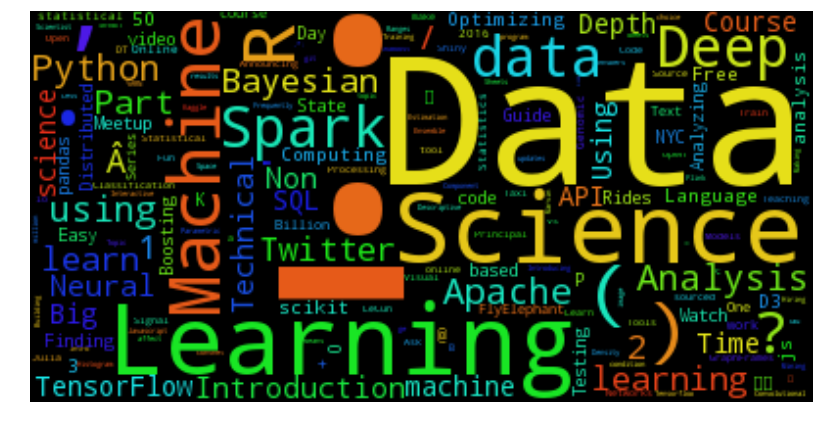

In [88]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
